In [2]:
#################################################################################################
# We noticed that the second peak in rtds is gone if the scope's grounding probe is connected  #
# to the grouding cable during data taking. We took data in ch2 to ch7 to check their rtds to  #
# verify this finding.                                                                         #
################################################################################################

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter  # Import ScalarFormatter
import uproot
sys.path.append("../")
import saq


Welcome to JupyROOT 6.28/06


In [3]:
# Define the list of file paths
root_file_paths = [
   '/home/wwz/saq_analysis/calibration/10_25_2023_testing_probing/10_25_2023_13_51_56.root', #ch2, with probing connected
   '/home/wwz/saq_analysis/calibration/10_25_2023_testing_probing/10_25_2023_14_00_10.root',
   '/home/wwz/saq_analysis/calibration/10_25_2023_testing_probing/10_25_2023_14_02_34.root',
   '/home/wwz/saq_analysis/calibration/10_25_2023_testing_probing/10_25_2023_14_06_05.root',
   '/home/wwz/saq_analysis/calibration/10_25_2023_testing_probing/10_25_2023_14_12_29.root',
   '/home/wwz/saq_analysis/calibration/10_25_2023_testing_probing/10_25_2023_14_16_37.root' #ch7, with probing connected
]
timestamps_list = []
masks_list = []

# Define constants
clock_rate = 30.3e6
nn = 0
cutoff = (2**32) - 1
loop_time = cutoff / clock_rate

real_channel= [2, 3, 4, 5, 6, 7]

# Iterate through each root file
for j, root_file_path in enumerate(root_file_paths):
    # Open the ROOT file
    file = uproot.open(root_file_path)

    # Access the tree from the ROOT file
    tree = file["tt"]  # 'tt' is the name of the data tree in the root file

    # Convert the tree data into a dictionary
    data = tree.arrays(library="np")

    # Get timestamps from the data
    timestamps = data["Timestamp"]
    mask = data["ChMask"]
    print(len(timestamps))
    print(timestamps[:20])
    #print(len(mask))

    #print(timestamps[:10])
    #print(mask[:10])
    
    #This line does the same thing as the loop above, but in a more consice and Pythonic way
    filtered_timestamps = [timestamps[i] for i in range(5, len(timestamps)) if mask[i] == 2**(real_channel[j]-1)]
    
    print(len(filtered_timestamps))
    print(filtered_timestamps[:20])

    # Initialize an array to store time in seconds
    time_sec = np.zeros(len(filtered_timestamps))

    # Convert the individual entries to show the time in seconds
    for i in range(len(filtered_timestamps)):
        time_sec[i] = filtered_timestamps[i] / clock_rate + (nn * loop_time)
        if i > 0 and filtered_timestamps[i] < filtered_timestamps[i - 1]:
            nn += 1
            time_sec[i] = float(filtered_timestamps[i] / clock_rate) + float(nn * loop_time)

    # Store the time_sec array in a list
    timestamps_list.append(time_sec)
    masks_list.append(data["ChMask"])

    nn=0

10947
[988196948 988308183     48250    116966    186089    286202    389529
    493604    591219    656558    742694    861266    861270    861275
    861280    944786   1038620   1105707   1171855   1246334]
10535
[286202, 389529, 493604, 591219, 656558, 742694, 861270, 861280, 944786, 1038620, 1105707, 1171855, 1246334, 1355248, 1458620, 1543261, 1609839, 1672947, 1771263, 1870548]
20012
[894400687 894463548     14213    116098    191244    265130    330862
    330866    376574    417548    417552    462113    520826    589020
    589024    658455    743774    807719    844214    891822]
14952
[265130, 330866, 376574, 417552, 462113, 520826, 589024, 658455, 743774, 807719, 844214, 891822, 932540, 981573, 1043363, 1089544, 1158333, 1241443, 1298506, 1342552]
8684
[893762014 893836187 893836191 893912173     63064    157414    266251
    392611    490428    575525    671270    768864    897564    998295
   1078930   1178928   1296816   1419136   1518455   1600312]
8679
[157414, 266251

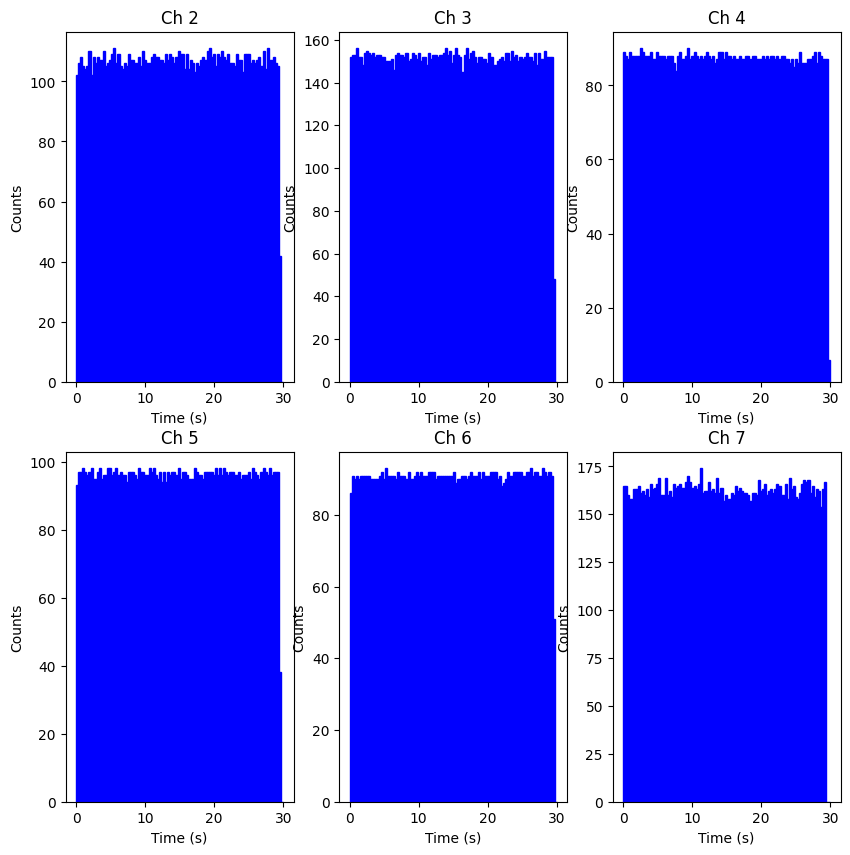

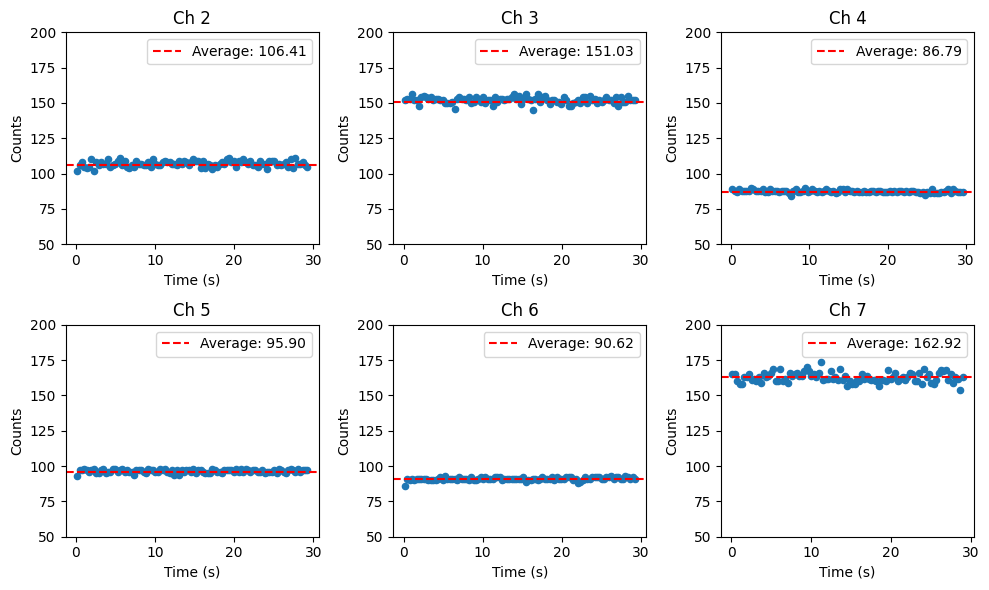

In [30]:
# Create a figure with a 3x5 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 10))

# Create lists to store bin content from each histogram
bin_contents = []
bin_center=[]

# Create lists to store averages for each channel
averages = []

# Define the desired range for each histogram

# Loop through your data and create histograms
for i in range(6):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Create the histogram and plot for the "timestamp" data
    hist, bins, _ = ax.hist(timestamps_list[i], range=(0, 30), bins=100, color='blue', alpha=1, edgecolor='blue')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Counts')
    ax.set_title(f'Ch {i + 2}')

  # Store the bin content in the bin_contents list
    bin_contents.append(hist)
    bin_center.append(bins)

# Create a new 3x5 subplot grid to display the scatter plots of bin content
fig2, axes2 = plt.subplots(2, 3, figsize=(10, 6))

for i, content in enumerate(bin_contents):
    # Calculate the center of each bin
    bin_centers = (bin_center[i][:-1] + bin_center[i][1:]) / 2

    # Filter out bins with zero bin content
    non_zero_bins = content != 0
    avg = np.mean(content[non_zero_bins])
    averages.append(avg)

    # Scatter plot of non-zero bin content in the new subplot grid with specified range
    row = i // 3
    col = i % 3
    ax2 = axes2[row, col]
    ax2.scatter(bin_centers[non_zero_bins][:-1], content[non_zero_bins][:-1], marker='o', s=20)

    # Draw the average line on the scatter plot
    ax2.axhline(y=averages[i], color='red', linestyle='--', label=f'Average: {averages[i]:.2f}')

    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Counts')
    ax2.set_title(f'Ch {i + 2}')
    ax2.set_ylim(50, 200)
    ax2.legend()

plt.tight_layout()
plt.show()

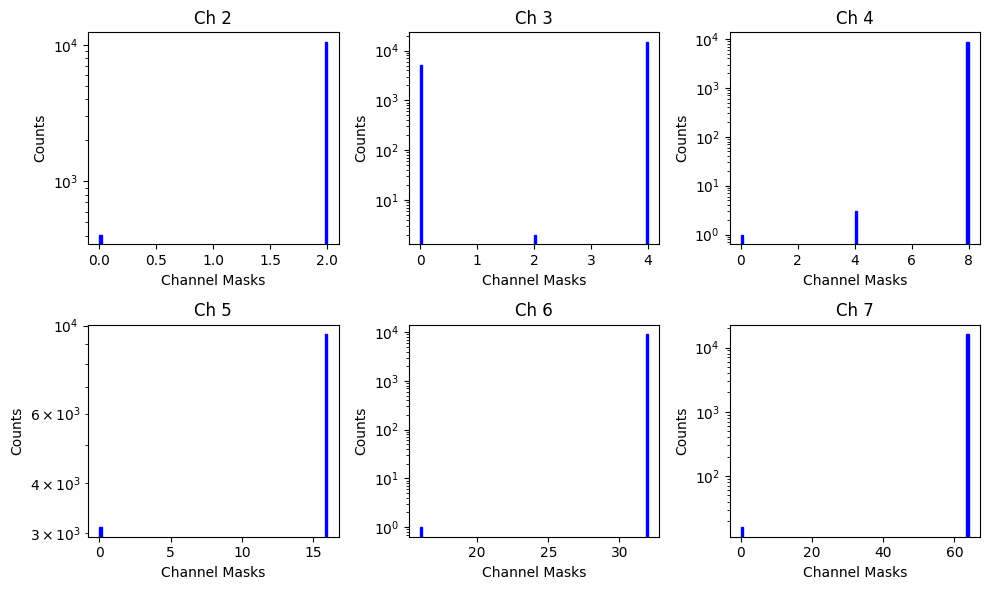

In [28]:
# Create a figure with a 3x5 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# Loop through your data and create histograms
for i in range(6):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Create the histogram and plot for the "timestamp" data
    hist, bins, _ = ax.hist(masks_list[i], bins=100, color='blue', alpha=1, edgecolor='blue')
    ax.set_xlabel('Channel Masks')
    ax.set_ylabel('Counts')
    ax.set_yscale('log')
    #ax.set_xscale('log')
    ax.set_title(f'Ch {i + 2}')

plt.tight_layout()
plt.show()

ch 2  ,mean rtd:  0.0028475428816767023  ,std rtd:  0.0005967547878084727
ch 2  ,mean charge:  14.237714408383512  ,std charge:  2.983773939042363
ch 3  ,mean rtd:  0.0019807689152631504  ,std rtd:  0.000541978546311194
ch 3  ,mean charge:  9.903844576315752  ,std charge:  2.70989273155597
ch 4  ,mean rtd:  0.003424056835045109  ,std rtd:  0.0005993771284623299
ch 4  ,mean charge:  17.120284175225546  ,std charge:  2.9968856423116494
ch 5  ,mean rtd:  0.003108501908878065  ,std rtd:  0.0005032875752789132
ch 5  ,mean charge:  15.542509544390324  ,std charge:  2.516437876394566
ch 6  ,mean rtd:  0.0032939893594710647  ,std rtd:  0.0006694461669416449
ch 6  ,mean charge:  16.469946797355323  ,std charge:  3.347230834708225
ch 7  ,mean rtd:  0.0018432029946174296  ,std rtd:  0.00067658480388212
ch 7  ,mean charge:  9.216014973087148  ,std charge:  3.3829240194106


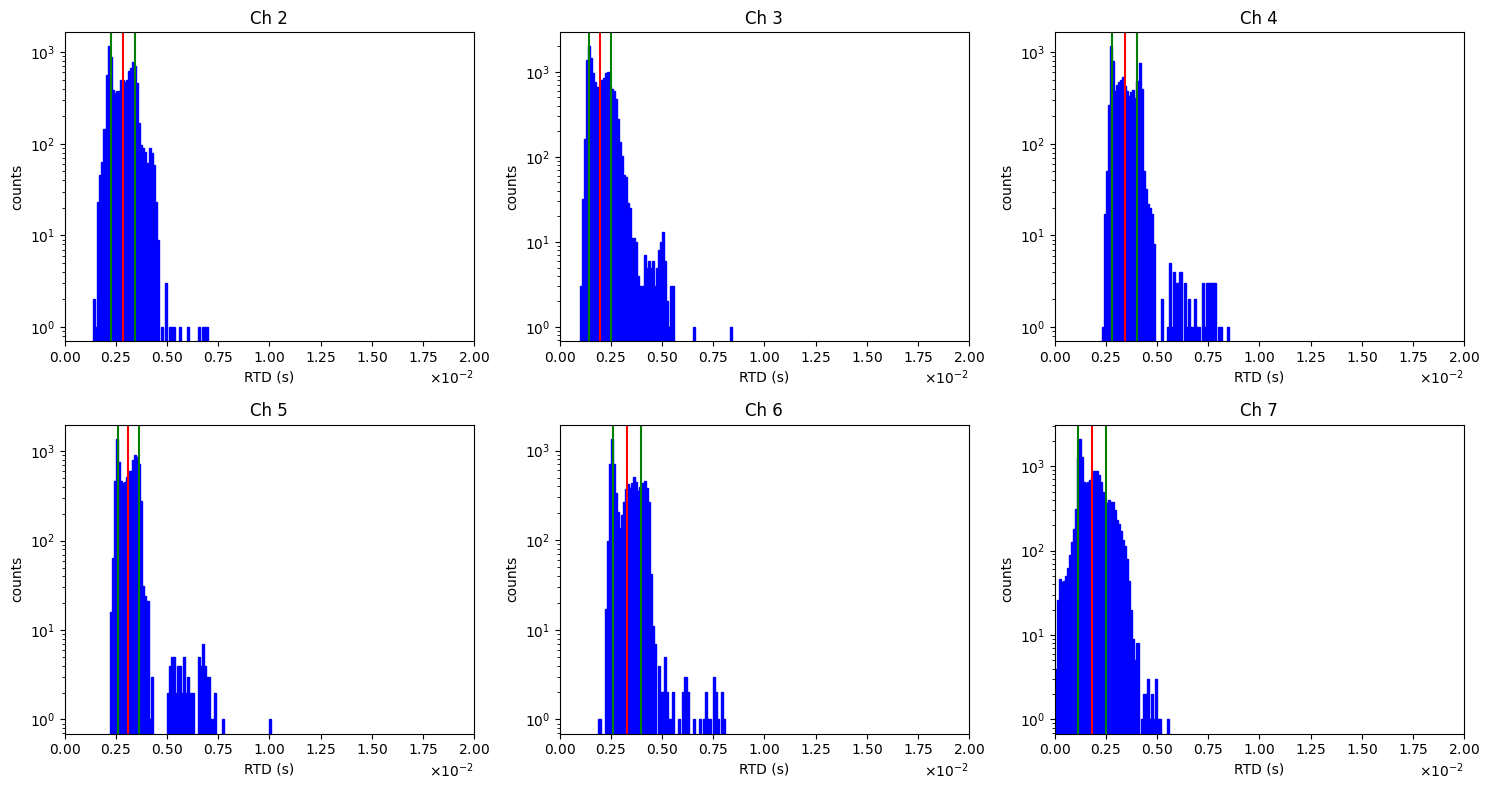

In [39]:
# Create a figure with a 3x5 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

j=2

mean_charge = [] # To store the mean charge per reset for each channel
std_charge = [] # To store the standard deviation for the mean charge per reset for each channel

# Iterate through each time data array and plot the time differences
for i in range(len(timestamps_list)):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Calculate time differences between adjacent data points
    rtd = np.diff(timestamps_list[i])

    # Set lower and upper cutoffs for the data
    lower_cutoff = 5e-5  # Example lower cutoff
    upper_cutoff = 5e-2  # Example upper cutoff

# Apply conditional filtering to keep only the data within the desired range
    filtered_rtd = rtd[(rtd >= lower_cutoff) & (rtd <= upper_cutoff)]

    mean_rtd = np.mean(filtered_rtd)
    std_rtd = np.std(filtered_rtd)

#Calcuate the mean charge per reset for each channel
    mean_Q = mean_rtd * 5000 # The charge is in pC since rtd is in s and current is in pA
    std_Q = std_rtd * 5000

    mean_charge.append(mean_Q)
    std_charge.append(std_Q)

    print("ch", j, " ,mean rtd: ",  mean_rtd, " ,std rtd: ", std_rtd)
    print("ch", j, " ,mean charge: ",  mean_Q, " ,std charge: ", std_Q)
    j = j+1



# Create a histogram of the filtered differences

    # Create a histogram of time differences
    ax.hist(filtered_rtd, bins=500,range=(0, 0.05), color='blue', alpha=1, edgecolor='blue')
    ax.axvline(mean_rtd, color = 'red')
    ax.axvline(mean_rtd-std_rtd , color = 'green')
    ax.axvline(mean_rtd+std_rtd, color = 'green')
    
    # Configure the x-axis formatter to use scientific notation
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))  # Apply scientific notation

     # Add titles (labels) to x and y axes
    ax.set_xlabel('RTD (s)')  # Replace with your desired x-axis label
    ax.set_ylabel('counts')  # Replace with your desired y-axis label

    # Define your desired x-axis range
    x_min = 0  # Replace with your desired minimum x-axis value
    x_max = 0.02  # Replace with your desired maximum x-axis value

     # Set the x-axis range
    ax.set_xlim(x_min, x_max)
    ax.set_yscale('log')
    ax.set_title(f'Ch {i + 2}')

plt.tight_layout()
plt.show()

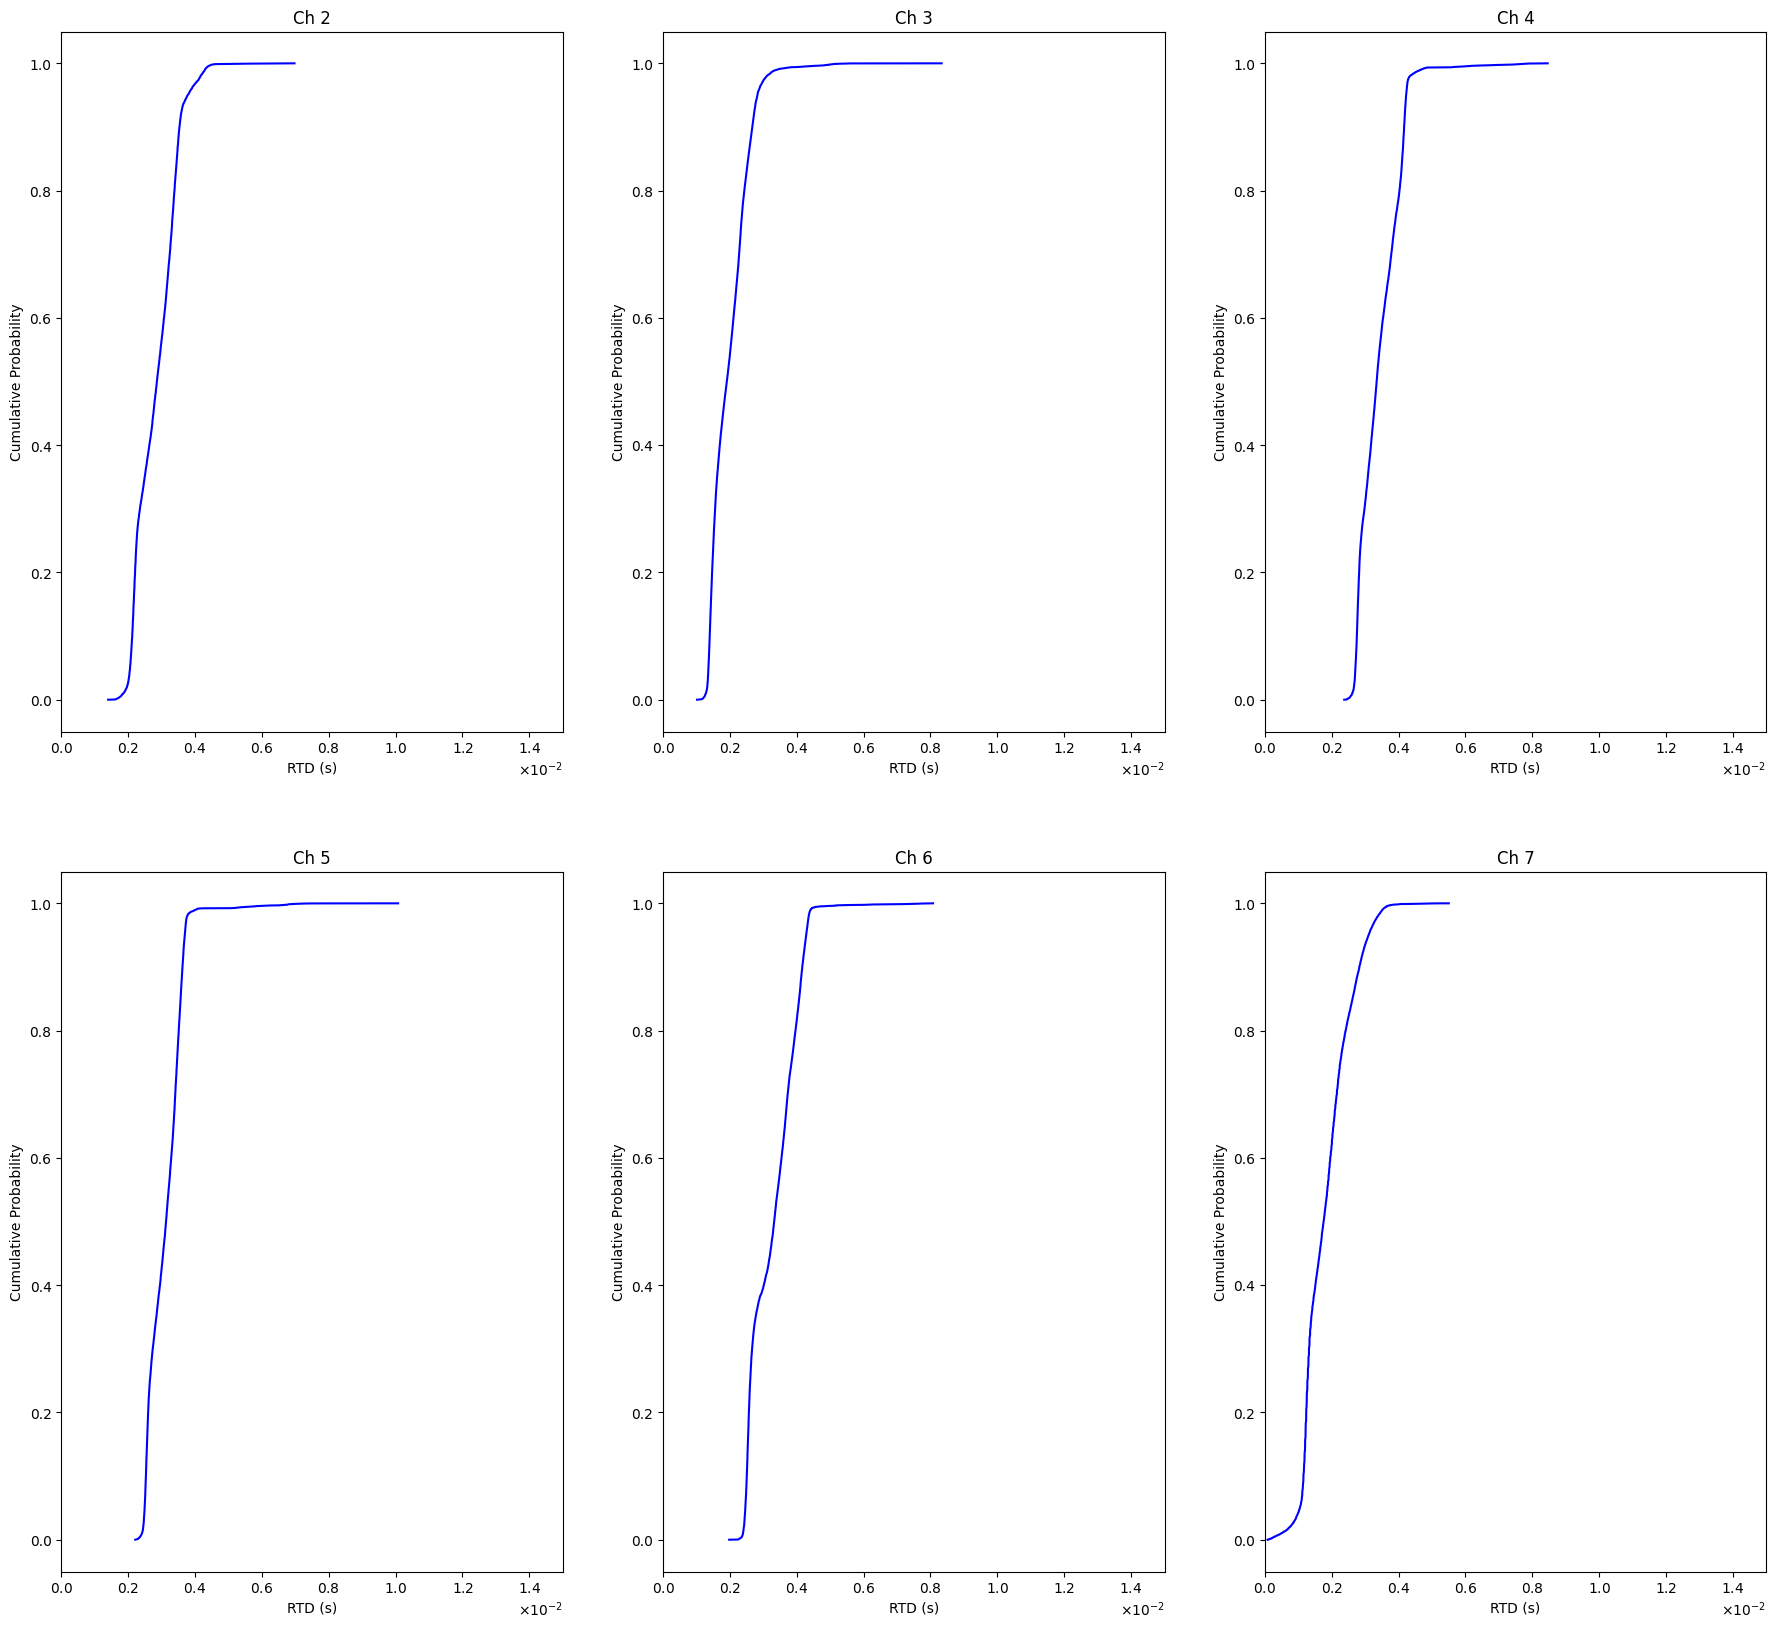

In [35]:
# Create a figure with a 3x5 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(22, 20))

# Iterate through each time data array and plot the time differences
for i in range(len(timestamps_list)):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Calculate time differences between adjacent data points
    rtd = np.diff(timestamps_list[i])

    # Set lower and upper cutoffs for the data
    lower_cutoff = 5e-5  # Example lower cutoff
    upper_cutoff = 5e-2  # Example upper cutoff

# Apply conditional filtering to keep only the data within the desired range
    filtered_rtd = rtd[(rtd >= lower_cutoff) & (rtd <= upper_cutoff)]

 # Calculate the cumulative distribution
    sorted_rtd = np.sort(filtered_rtd)
    cumulative_prob = np.arange(1, len(sorted_rtd) + 1) / len(sorted_rtd)

    ax.plot(sorted_rtd, cumulative_prob, color='blue')

    
    # Add labels and a title
    ax.set_xlabel('RTD (s)')
    ax.set_ylabel('Cumulative Probability')
    ax.set_title(f'Ch {i+2}')

    # Configure the x-axis formatter to use scientific notation
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

    # Define your desired x-axis range
    x_min = 0  # Replace with your desired minimum x-axis value
    x_max = 0.015  # Replace with your desired maximum x-axis value

    # Set the x-axis range
    ax.set_xlim(x_min, x_max)

[2, 3, 4, 5, 6, 7]
The average charege per reset is:  13.748385745792936 pC


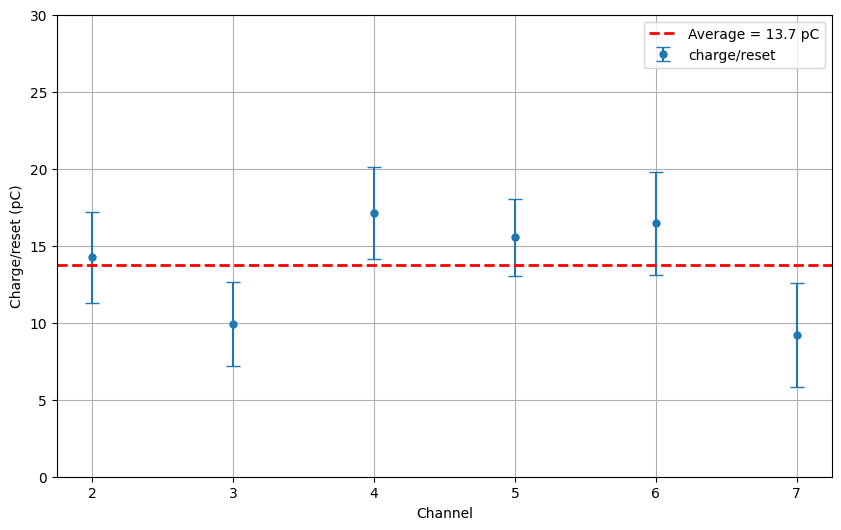

In [11]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define the range of channels to plot
start_channel = 2  # Start channel
end_channel = 7  # End channel

# Create a list of channel numbers within the specified range
x_channels = list(range(start_channel, end_channel+1))
print(x_channels)

#x_channels =[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
# Plot the average charge per reset with error bars
ax.errorbar(x_channels, mean_charge, yerr=std_charge, fmt='o', markersize=5, capsize=5, label='charge/reset')

# Calculate the average charge of the mean charge for 10 channels
avg_charge = np.mean(mean_charge) #average charge = average rtd in second* 5 nA

# Plot a flat line at the calculated average value
ax.axhline(avg_charge, color='red', linestyle='--', label='Average = 13.7 pC', linewidth=2)
print("The average charege per reset is: ", avg_charge, "pC")

# Configure the x-axis formatter to use integers
ax.set_xticks(x_channels)

# Add labels to x and y axes
ax.set_xlabel('Channel')
ax.set_ylabel('Charge/reset (pC)')

# Set the x-axis and y-axis range and labels
#ax.set_xlim(start_channel-0.1 , end_channel)
ax.set_ylim(0, 30)  
ax.grid(True)

# Show the legend
ax.legend()

# Show the plot
plt.show()